<a href="https://colab.research.google.com/github/SoniaVG/Analysis-of-data/blob/main/price_house_inferencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ESTADÍSTICA INFERENCIAL**

**En este estudio se quiere comprobar si existe una diferencia significativa entre el precio promedio de las casas dependiendo de la ubicación de las casas. En el caso de que exista, se quiere saber qué posiciones difieren del resto. **

**MODELO: ANOVA DE UN FACTOR**




In [4]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d camnugent/california-housing-prices
!unzip /content/california-housing-prices.zip
import pandas as pd
datos=pd.read_csv('/content/housing.csv')

Saving kaggle.json to kaggle.json
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 45.8MB/s]
Archive:  /content/california-housing-prices.zip
  inflating: housing.csv             


In [5]:
datos.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# ANALISIS GRAFICO DE LOS DATOS

***Considerando la existencia de los valores atipicos, y consideranso que la dispersión de estos valores pueden afectar las pruebas de hipótesis, se opta por remover dichos puntos.***


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([0.e+00, 1.e-06, 2.e-06, 3.e-06, 4.e-06, 5.e-06, 6.e-06]),
 <a list of 7 Text major ticklabel objects>)

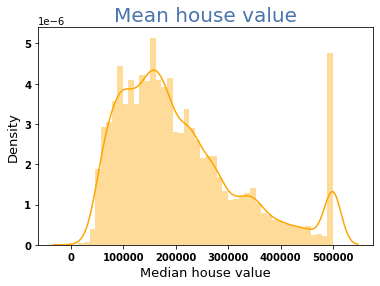

In [24]:
sns.distplot(datos.median_house_value, kde=True,color="Orange")
plt.title("Mean house value",fontdict={'fontsize':20, 'color': '#4873ab'})
plt.xlabel("Median house value", fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')


In [14]:
#datos.groupby(ocean_proximity).size()
datos2=datos[datos.median_house_value<=500000]
datos2.groupby("ocean_proximity").size()

ocean_proximity
<1H OCEAN     8604
INLAND        6524
ISLAND           5
NEAR BAY      2096
NEAR OCEAN    2446
dtype: int64

**Considerando el tamaño del grupo ISLAND este grupo no se considerara para el análisis.**





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([0.e+00, 1.e-06, 2.e-06, 3.e-06, 4.e-06, 5.e-06, 6.e-06]),
 <a list of 7 Text major ticklabel objects>)

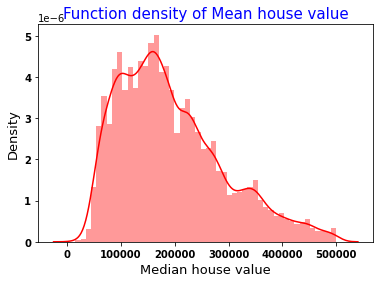

In [31]:
sns.distplot(datos2.median_house_value, kde=True,color="Red")
plt.title("Function density of Mean house value",fontdict={'fontsize':15},color="blue")
plt.xlabel("Median house value", fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

**Observación:** En general, cuanto mayor sea el solapamiento entre la función de densidad de cada grupo, menor será la intensidad de la  asociación entre las  variables y , viceversa, cuanto menor sea el solapamiento, mayor será el tamaño del efecto de la relación. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

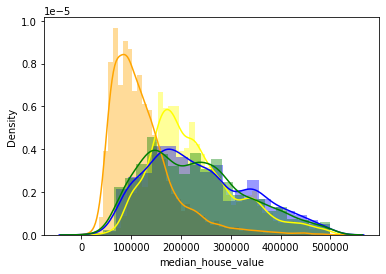

In [72]:
# función de densidad para cada grupo
#===========================================================================
g1=datos2[datos2["ocean_proximity"]=="<1H OCEAN"].median_house_value
g2=datos2[datos2["ocean_proximity"]=="INLAND"].median_house_value
#g3=datos2[datos2["ocean_proximity"]=="ISLAND"].median_house_value
g4=datos2[datos2["ocean_proximity"]=="NEAR BAY"].median_house_value
g5=datos2[datos2["ocean_proximity"]=="NEAR OCEAN"].median_house_value

sns.distplot(g1, kde=True,color="yellow")
sns.distplot(g2, kde=True,color="Orange")
#sns.distplot(g3, kde=True,color="green")
sns.distplot(g4, kde=True,color="blue")
sns.distplot(g5, kde=True,color="green")
plt.show()

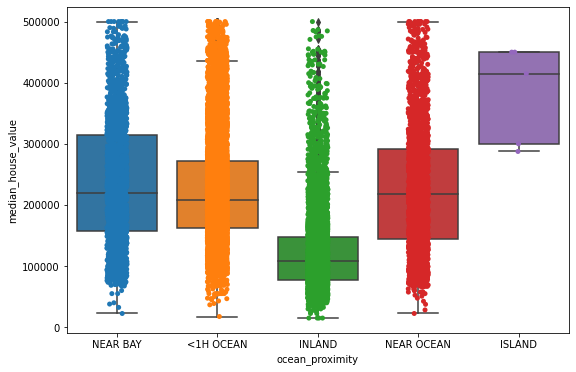

In [33]:
fig = plt.figure(1, figsize=(9, 6))
sns.boxplot(x='ocean_proximity',y='median_house_value',data=datos2)
sns.stripplot(x="ocean_proximity", y="median_house_value",data=datos2)

**De la grafica de cajas, se puede deducir lo siguiente:**

1- Existe cierto grado de asimetria en la distribución en cada uno de los grupos, sin embargo, existe sesgo en todos los grupos.

2- Hay valores extremos en los grupos: *1h ocean* e *inland* que habría que estudiar a mayor detalles para dejarlos o eliminarlos.

3- El tamaño de las cajas son aparentemente distintas, por lo cual, la disperción de los datos en cada uno de los grupos es distinta. (Lo cual a su vez puede indicar que  podría NO darse la hocedasticidad  :: igualdad de varianzas) 

**VERIFICAR LAS CONDICIONES DEL ANOVA**

1- Independencia: Suponemos que los datos fueron tomados aleatoriamente, por lo cual asumimos la independencia.

2- Normalidad: El anova es robusto aún con la falta de normalidad de los datos, más aún, considerando que el tamaño de los datos son grandes para este caso.

3- Homocedasticidad


In [35]:
!pip install pingouin 

     |████████████████████████████████| 182 kB 8.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 9.8 MB 54.6 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193661 sha256=c8c0fa2ec334e8dca948eb292f25e1965510539c5d98099aea3e16f89393ac05
  Stored in directory: /root/.cache/pip/wheels/14/46/f9/cedd81d68d2515c24bbbd000d5b347e4fe092ccc4b568f7f70
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=36012110bd39a3fde2fc0bdbe9fb32e81eea2dc19072709ec63e2d9817771323
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsm

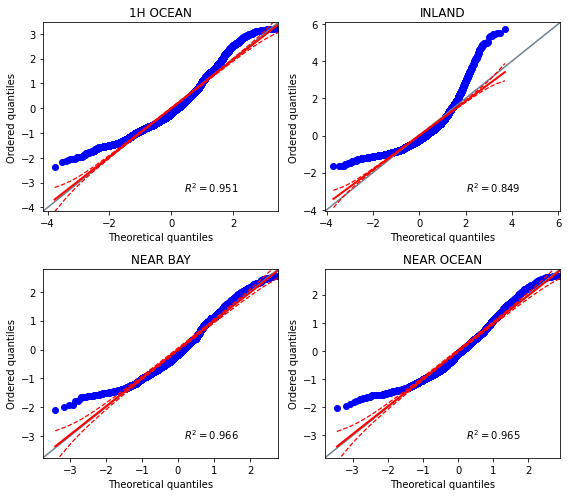

In [67]:
#verificar normalidad de forma grafica/ gráfico Q-Q 
#Si estos se ajustan a la recta y=x, entonces los datos se distribuyen de forma normal en cada uno de los grupos
#===============================================================================================================
import pingouin as pg

fig, axs = plt.subplots(2, 2, figsize=(8, 7))
pg.qqplot(g1, dist='norm', ax=axs[0,0])
axs[0,0].set_title("1H OCEAN")
pg.qqplot(g2, dist='norm', ax=axs[0,1])
axs[0,1].set_title("INLAND")
pg.qqplot(g4, dist='norm', ax=axs[1,0])
axs[1,0].set_title("NEAR BAY")
pg.qqplot(g5, dist='norm', ax=axs[1,1])
axs[1,1].set_title("NEAR OCEAN")
plt.tight_layout()

De las graficas se puede observar que los datos no se ajustan de forma adecuada a la recta y=x, por lo cual, esto podría indicar la falta de normalidad de la variable en estudio. Por tanto, se realiza una prueba de hipótesis para validar este hallazgo.

In [47]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
import pingouin as pg
x=datos2[(datos.ocean_proximity=="<1H OCEAN") | (datos.ocean_proximity=="INLAND") |(datos.ocean_proximity=="NEAR BAY") | (datos.ocean_proximity=="NEAR OCEAN") ]
pg.normality(data=x, dv='median_house_value', group='ocean_proximity')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  


,W,pval,normal
NEAR BAY,0.965269,4.708734e-22,False
<1H OCEAN,0.951230,0.000000e+00,False
INLAND,0.849333,0.000000e+00,False
NEAR OCEAN,0.964692,5.197204e-24,False


Por tanto, no hay normalidad en los datos. 
Ojo: el grupo *ISLAND* se excluye por el tamaño de la muestra en este grupo

In [48]:
#verificar la homocedasticidad: Recordar que de ser distintas, estás no debe de diferir por mas de 2 veces.
# ========================================================================================================
pg.homoscedasticity(data=x, dv='median_house_value', group='ocean_proximity', method='levene')

,W,pval,equal_var
levene,438.004297,1.743273e-275,False


Considerando que $p_{value}<\alpha=0.05$, se tiene que rechazar la hipótesis nula de que se da homocedasticidad en los datos.

In [58]:
#ver varinaza entre cada uno de los grupos
# ==============================================================================
import statistics
print(statistics.pstdev(g1))
print(statistics.pstdev(g2))
print(statistics.pstdev(g4))
print(statistics.pstdev(g5))
cociente=statistics.pstdev(g4)/statistics.pstdev(g2)
print("2 > %0.4f" %cociente)

86729.47425957189
65845.54203875245
103006.17845665735
101889.22094112697
2 > 1.5644


Sin embargo, considerando que: desviación estándar no varía más de 2 veces entre cada grupos, la prueba de anova, es todavía fiable.


In [50]:
# ANOVA de una vía (One-way ANOVA)
# ==============================================================================
pg.anova(data=x, dv='median_house_value', between='ocean_proximity', detailed=True)



,Source,SS,DF,MS,F,p-unc,np2
0,ocean_proximity,4.699857e+13,3,1.566619e+13,2190.683803,0.0,0.250478
1,Within,1.406371e+14,19666,7.151279e+09,NaN,NaN,NaN


Con esto, $p_{value}<\alpha=0.05$ tenemos, que los datos muestran evidencia para rechazar la hipótesis nula de la igualdad de medias entre cada uno de los grupos.
Con esto, verificamos ahora entre que grupos ocurre la diferencia.
Para ello, es importante considerar el hecho:

**1- Las varianzas no son iguales**

#PRUEBA POST HOC
Luego de implementar la prueba ANOVA, es necesario determinar entre que grupos se presenta la diferencia en medias.

In [60]:
!pip install scikit_posthocs


     |████████████████████████████████| 43 kB 956 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37902 sha256=e83e9659136b50be98f056366abe36b6929756245a87a111c71c422fd7ff0ee6
  Stored in directory: /root/.cache/pip/wheels/b8/21/e6/f39794d4a6ee3d3cc5146ca80b5cd949452ad4a8fde9f6b9fc
Successfully built scikit-posthocs


In [63]:
import scikit_posthocs as sp
sp.posthoc_ttest(x, val_col='median_house_value', group_col='ocean_proximity', p_adjust='holm')

,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN
NEAR BAY,1.000000e+00,1.269844e-08,0.0,0.005075
<1H OCEAN,1.269844e-08,1.000000e+00,0.0,0.073535
INLAND,0.000000e+00,0.000000e+00,1.0,0.000000
NEAR OCEAN,5.075111e-03,7.353457e-02,0.0,1.000000


#CONCLUSION :
1. la media de los grupoS **INLAND y NEAR BAY** presentan diferencias significativas con respecto la media de cada uno de los otros 3 grupos restantes ($p_{value}<\alpha=0.05$).


2. La media del grupo **1H OCEAN** estadísticamente tiene una media igual a la media del grupo **NEAR OCEAN**

3. Considerando la existencia de medias distintas, podemos afirmar que, si existe relación o dependencia entre la media del precio de las casas y la ubicación de las casas en **INLAND y NEAR BAY**.
